# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

####Inferences
* From the graph Latitude Vs Temperature, we can see that cities around the equator has very high max temperatures (between 70-90 F).
* From the plot City Latitude Vs Humidity, we can see that the cities around equator has humidity ranging from 60 - 100 %.
* From the plot City Latitude Vs Wind Speed, we can see that the cities around the equator has wind speed between 0 - 20 mph

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
#print(list(lat_lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)


601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
# Yield successive n-sized chunks from l. 
def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n] 
  
# How many elements each 
# list should have 
n = 50
  
list_of_citylist = list(divide_chunks(cities, n)) 
list_of_citylist


[['rikitea',
  'airai',
  'bengkulu',
  'vao',
  'cape town',
  'longyearbyen',
  'malkangiri',
  'albany',
  'khatanga',
  'kismayo',
  'butaritari',
  'cabo san lucas',
  'ushuaia',
  'atuona',
  'kapaa',
  'busselton',
  'faanui',
  'umzimvubu',
  'qaanaaq',
  'tessalit',
  'dikson',
  'nador',
  'jamestown',
  'barentsburg',
  'chacabuco',
  'terrace',
  'tutoia',
  'marawi',
  'thompson',
  'vardo',
  'narsaq',
  'taltal',
  'belushya guba',
  'sola',
  'mao',
  'chumikan',
  'korla',
  'vaini',
  'mar del plata',
  'ostrovnoy',
  'teguise',
  'souillac',
  'hermanus',
  'tuktoyaktuk',
  'xuddur',
  'bluff',
  'port elizabeth',
  'fairbanks',
  'henties bay',
  'punta arenas'],
 ['hasaki',
  'tiksi',
  'castro',
  'tuatapere',
  'lodja',
  'geraldton',
  'talnakh',
  'east london',
  'cockburn harbour',
  'nikolskoye',
  'nuuk',
  'qaqortoq',
  'homer',
  'capreol',
  'acarau',
  'san policarpo',
  'mys shmidta',
  'katsuura',
  'bitung',
  'hirado',
  'bambous virieux',
  'mukhen

In [5]:
"""
list_of_citylist =[['ervo',
  'kasongo-lunda',
  'nioro',
  'duvan'],
  ['biak',
  'bontang',
  'liverpool'],
  ['glendive',
  'esperance',
  'bozoum']]
"""

city_name = []          
cloudiness = []   
country = []          
date = []            
humidity = []        
lat = []             
lng = []             
max_temp = []        
wind_speed = [] 

print("\nBeginning Data Retrieval")
print("-------------------------")

for i,citylist in enumerate(list_of_citylist):
    
    for j,city in enumerate(citylist):
        time.sleep(1.1)
        response = requests.get(query_url + city)
        
        if response:
            print(f"Processing Record {j+1} of Set {i+1} | {city}")
            response_json = response.json()
            #print(response_json["name"], response_json["sys"]["country"])
            
            city_name.append(response_json["name"])
            cloudiness.append(response_json["clouds"]["all"])
            country.append(response_json["sys"]["country"])
            date.append(response_json["dt"])
            humidity.append(response_json["main"]["humidity"])
            lat.append(response_json["coord"]["lat"])
            lng.append(response_json["coord"]["lon"])
            max_temp.append(response_json["main"]["temp_max"])
            wind_speed.append(response_json["wind"]["speed"])
            
            
        else:
            print(f"{city} not found. Skipping...")
    #time.sleep(10)
            
print("-----------------------------")
print("Data Retrieval Complete")    
print("-----------------------------")
  


Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | airai
bengkulu not found. Skipping...
Processing Record 4 of Set 1 | vao
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | malkangiri
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | khatanga
kismayo not found. Skipping...
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | faanui
umzimvubu not found. Skipping...
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | tessalit
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | nador
Processing Record 23 of Set 1 | jamestown
barentsburg not found. Skipping...
Processing Re

Processing Record 5 of Set 5 | saintes
marcona not found. Skipping...
Processing Record 7 of Set 5 | cookeville
kuche not found. Skipping...
Processing Record 9 of Set 5 | bowen
Processing Record 10 of Set 5 | salina
angra not found. Skipping...
Processing Record 12 of Set 5 | vila franca do campo
Processing Record 13 of Set 5 | vilhena
attawapiskat not found. Skipping...
Processing Record 15 of Set 5 | kasama
Processing Record 16 of Set 5 | bang saphan
Processing Record 17 of Set 5 | portland
Processing Record 18 of Set 5 | villa constitucion
Processing Record 19 of Set 5 | kaya
Processing Record 20 of Set 5 | georgetown
Processing Record 21 of Set 5 | phanom sarakham
Processing Record 22 of Set 5 | maltahohe
Processing Record 23 of Set 5 | gat
Processing Record 24 of Set 5 | manaure
Processing Record 25 of Set 5 | esperance
Processing Record 26 of Set 5 | lompoc
Processing Record 27 of Set 5 | mareeba
Processing Record 28 of Set 5 | zuwarah
Processing Record 29 of Set 5 | luz
amderma

Processing Record 8 of Set 9 | coquimbo
Processing Record 9 of Set 9 | ariquemes
Processing Record 10 of Set 9 | fort nelson
Processing Record 11 of Set 9 | manavalakurichi
Processing Record 12 of Set 9 | auki
Processing Record 13 of Set 9 | praia da vitoria
Processing Record 14 of Set 9 | lerwick
Processing Record 15 of Set 9 | barra patuca
Processing Record 16 of Set 9 | mount isa
Processing Record 17 of Set 9 | antofagasta
Processing Record 18 of Set 9 | haines junction
Processing Record 19 of Set 9 | carnarvon
taburi not found. Skipping...
Processing Record 21 of Set 9 | gurun
Processing Record 22 of Set 9 | mount gambier
Processing Record 23 of Set 9 | koppang
Processing Record 24 of Set 9 | slave lake
Processing Record 25 of Set 9 | svarstad
Processing Record 26 of Set 9 | alice springs
Processing Record 27 of Set 9 | kavaratti
Processing Record 28 of Set 9 | yerbogachen
cam pha not found. Skipping...
Processing Record 30 of Set 9 | kiunga
Processing Record 31 of Set 9 | nioro
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
#creating df from dict
weather_dict = {"city": city_name,
    "lat": lat,
    "cloudiness": cloudiness,
    "country": country,
    "date": date,
    "humidity": humidity,
    "lng": lng,
    "max_temp": max_temp,
    "wind_speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()
#weather_data.max()

,city,lat,cloudiness,country,date,humidity,lng,max_temp,wind_speed
0,Rikitea,-23.12,100,PF,1561849511,67,-134.97,70.32,12.73
1,Airai,-8.93,88,TL,1561849513,63,125.41,75.57,1.59
2,Vao,59.10,4,EE,1561849515,72,26.19,57.77,11.61
3,Cape Town,-33.93,0,ZA,1561849268,76,18.42,57.00,18.34
4,Longyearbyen,78.22,75,NO,1561849518,69,15.63,39.20,13.87


In [13]:
#write city data to output csv
weather_data.to_csv(output_data_file, index = None, header=True)

#display columns and row_count
weather_data.count()

city          535
lat           535
cloudiness    535
country       535
date          535
humidity      535
lng           535
max_temp      535
wind_speed    535
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

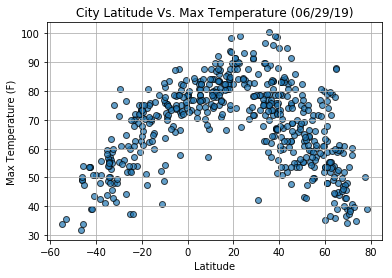

In [14]:
plt.scatter(weather_data['lat'], weather_data['max_temp'],
            edgecolors='Black', alpha=0.7)
 

plt.title("City Latitude Vs. Max Temperature (06/29/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


plt.grid(True)

#Save figure
plt.savefig("./Images/CityLatitudeVsMaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

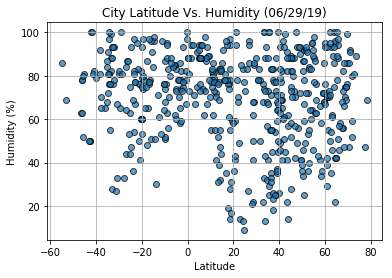

In [15]:
plt.scatter(weather_data['lat'], weather_data['humidity'],
            edgecolors='Black', alpha=0.7)
 

plt.title("City Latitude Vs. Humidity (06/29/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.grid(True)

#Save figure
plt.savefig("./Images/CityLatitudeVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

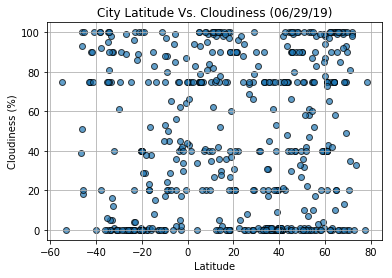

In [16]:
plt.scatter(weather_data['lat'], weather_data['cloudiness'],
            edgecolors='Black', alpha=0.7)
 

plt.title("City Latitude Vs. Cloudiness (06/29/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.grid(True)

#Save figure
plt.savefig("./Images/CityLatitudeVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

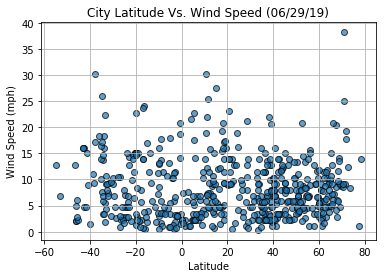

In [17]:
plt.scatter(weather_data['lat'], weather_data['wind_speed'],
            edgecolors='Black', alpha=0.7)
 

plt.title("City Latitude Vs. Wind Speed (06/29/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.grid(True)

#Save figure
plt.savefig("./Images/CityLatitudeVsWindSpeed.png")
plt.show()